In [1]:
from environment import NormalMoveEnv
from experiment import Trajectory
from nn import BetaModel, Model, GeneralModel
from rl import Agent

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline

# Env

In [2]:
env = NormalMoveEnv()

s = env.reset()
print(s)
print(env.step(0))

# ax = env.plot()

[-1.9131651  -7.71548811]
(array([-0.9167096, -7.718621 ], dtype=float32), True, False)


# Trajectory

<AxesSubplot: >

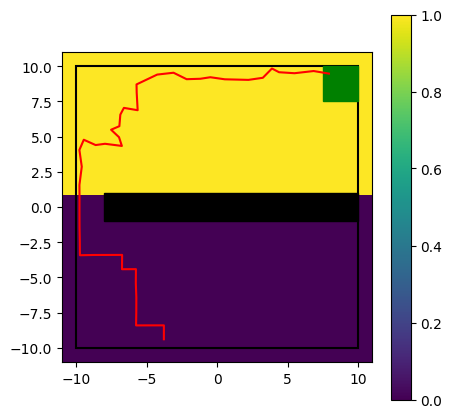

In [5]:
def my_policy(s):
    if s[1] < -1.:
        return np.random.choice(2, 1)[0] + 1
    elif s[1] > 1.:
        return np.random.choice(2, 1)[0] * 2 + 1
    else:
        return 2

t = Trajectory(env, policy=my_policy)
ax = t.plot(env.plot())
ax

# NN Model

186.20025735255524 53.610195041046964


<AxesSubplot: >

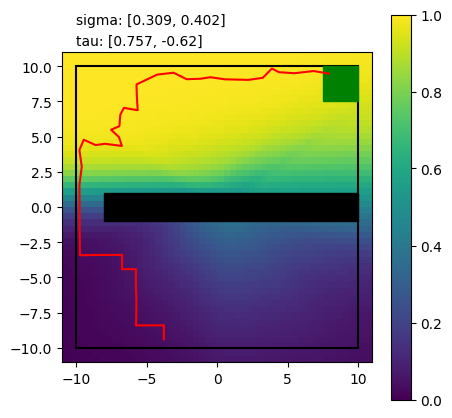

In [20]:
m = Model(env, k=2, lr=1e-5, momentum=.9)

ll = m.batch_train(t.run, 1_000)
print(ll[0], ll[-1])

m.plot(t.plot(env.plot(background=False)))

115.15360656920458 -17.021182287917505


<AxesSubplot: title={'center': 'theta_1'}>

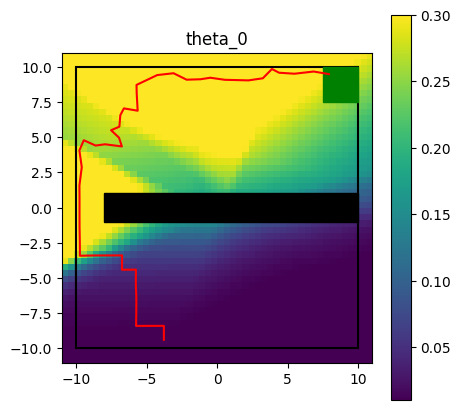

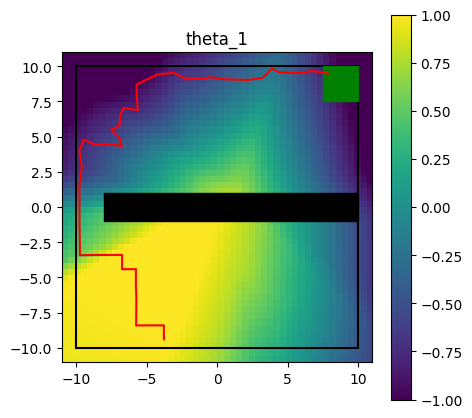

In [31]:
m = GeneralModel(env, k=2, lr=1e-6, momentum=.9)

ll = m.batch_train(t.run, 10_000)
print(ll[0], ll[-1])

# m.plot(t.plot(env.plot(background=False)))
m.plot(t.plot(env.plot(background=False)), param=0)
m.plot(t.plot(env.plot(background=False)), param=1)